In [1]:
# https://www.youtube.com/watch?v=H6du_pfuznE
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader as pdr 

In [2]:
df = pd.read_csv(r'E:\Data_warehouse\time_series_data\AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df1 = df.reset_index()['close']
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [4]:
df1.shape

(1258,)

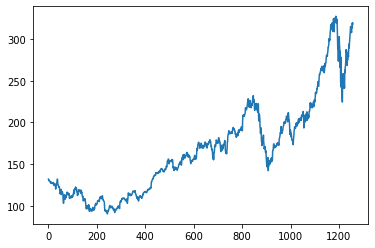

In [5]:
plt.plot(df1)
plt.show()

In [6]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

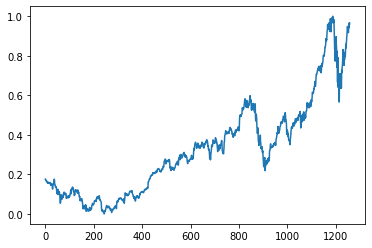

In [7]:
plt.plot(df1)
plt.show()

In [8]:
# timeseries data always depends on the proceeding data set  
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size

train_data = df1[0:training_size, :]
test_data = df1[training_size:len(df1), : 1]

In [9]:
df1.shape, train_data.shape, test_data.shape

((1258, 1), (817, 1), (441, 1))

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100 
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((716, 100), (716,), (340, 100), (340,))

In [16]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # <-- last two object will be used for training
X_train

array([[[0.17607447],
        [0.17495567],
        [0.16862282],
        ...,
        [0.09055982],
        [0.08388922],
        [0.09085536]],

       [[0.17495567],
        [0.16862282],
        [0.1696994 ],
        ...,
        [0.08388922],
        [0.09085536],
        [0.0873934 ]],

       [[0.16862282],
        [0.1696994 ],
        [0.16727181],
        ...,
        [0.09085536],
        [0.0873934 ],
        [0.09030651]],

       ...,

       [[0.34801148],
        [0.32930845],
        [0.32145571],
        ...,
        [0.50042219],
        [0.50413747],
        [0.5062062 ]],

       [[0.32930845],
        [0.32145571],
        [0.32694419],
        ...,
        [0.50413747],
        [0.5062062 ],
        [0.51920966]],

       [[0.32145571],
        [0.32694419],
        [0.32230009],
        ...,
        [0.5062062 ],
        [0.51920966],
        [0.53719497]]])

In [21]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test

array([[[0.52651355],
        [0.52837119],
        [0.53119986],
        ...,
        [0.26154691],
        [0.25187875],
        [0.26483999]],

       [[0.52837119],
        [0.53119986],
        [0.53871485],
        ...,
        [0.25187875],
        [0.26483999],
        [0.27273495]],

       [[0.53119986],
        [0.53871485],
        [0.5461454 ],
        ...,
        [0.26483999],
        [0.27273495],
        [0.2766191 ]],

       ...,

       [[0.81875369],
        [0.84256523],
        [0.84210082],
        ...,
        [0.92544119],
        [0.91771511],
        [0.9483239 ]],

       [[0.84256523],
        [0.84210082],
        [0.84936249],
        ...,
        [0.91771511],
        [0.9483239 ],
        [0.94064004]],

       [[0.84210082],
        [0.84936249],
        [0.85835515],
        ...,
        [0.9483239 ],
        [0.94064004],
        [0.96635143]]])

In [22]:
# create the stacked LSTM Model 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1) # verbose = 1 한 epoch 할때 마다 학습 내용을 print 해서 보여준다.

Epoch 1/100
12/12 [==============================] - 7s 283ms/step - loss: 0.0146 - val_loss: 0.0554
Epoch 2/100
12/12 [==============================] - 2s 139ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 3/100
12/12 [==============================] - 2s 132ms/step - loss: 8.3140e-04 - val_loss: 0.0070
Epoch 4/100
12/12 [==============================] - 2s 130ms/step - loss: 7.0936e-04 - val_loss: 0.0035
Epoch 5/100
12/12 [==============================] - 2s 131ms/step - loss: 6.1271e-04 - val_loss: 0.0036
Epoch 6/100
12/12 [==============================] - 2s 130ms/step - loss: 5.8116e-04 - val_loss: 0.0036
Epoch 7/100
12/12 [==============================] - 1s 115ms/step - loss: 5.7018e-04 - val_loss: 0.0033
Epoch 8/100
12/12 [==============================] - 1s 113ms/step - loss: 5.5737e-04 - val_loss: 0.0032
Epoch 9/100
12/12 [==============================] - 1s 110ms/step - loss: 5.6322e-04 - val_loss: 0.0032
Epoch 10/100
12/12 [==============================] - 1s 113ms/

In [25]:
import tensorflow as tf 
tf.__version__

'2.9.1'

In [26]:
# predict and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 20ms/step


In [27]:
# transform to original scale 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
# calculate RMSE performance metrics 
import math 
from sklearn.metrics import mean_squared_error 
math.sqrt((mean_squared_error(y_test, test_predict)))

# mse = np.mean(np.sqrt((y_test - test_predict.reshape(y_test.shape))**2))
# mse

236.81861267577423

In [29]:
math.sqrt(mean_squared_error(y_train, train_predict))

141.5886482280937

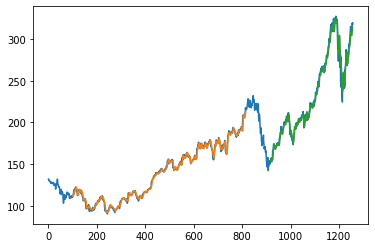

In [53]:
# ploting 
# shift train predictions for plotting 
look_back = 100 
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting 
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan 
testPredictPlot[len(train_predict) + (look_back*2) + 1 : len(df1) - 1, : ] = test_predict

# plot baseline and predictions 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [54]:
# predict future 30 days and plot the output 

In [55]:
len(test_data)

441

In [60]:
x_input = test_data[341:].reshape(1, -1)
x_input

array([[0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
        0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
        0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
        0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
        0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
        0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
        0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
        0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
        0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
        0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
        0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
        0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
        0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
        0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
        0.77222832, 0.83049059, 0.8194292 , 0.82

In [63]:
temp_input = list(x_input) 
temp_input = temp_input[0].tolist()
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [64]:
# demonstrate prediction for next 10 days 

lst_output = []
n_steps = 100 
i = 0 

while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95048046]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

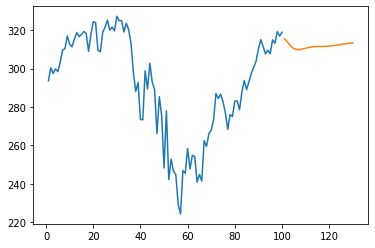

In [66]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

In [69]:
df1.shape

(1258, 1)

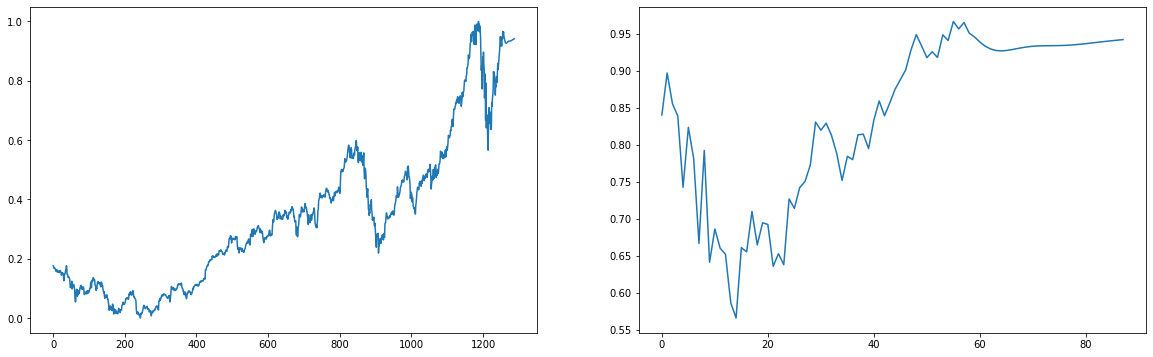

In [79]:
df3 = df1.tolist()
df3.extend(lst_output)

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(df3)

plt.subplot(122)
plt.plot(df3[1200:])
plt.show()

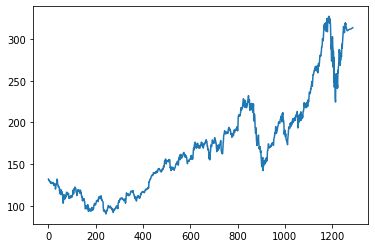

In [80]:
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)